In [1]:
from utility_bferror import *
import datetime

In [2]:
tb = BFSolver_Toolbox()
er = BFSovler3D_Error()

# 1. Try One Case

In [3]:
i = 1

ndata,ndataVar = er.ndata[i],er.ndataVar[i]
nmcbg,nmcbgVar = er.nmcbg[i].dot(np.array([1,1,1])), er.nmcbgVar[i].dot(np.array([1,1,1]))
nfake,nfakeVar = er.nfake[i],er.nfakeVar[i]
a,aVar = er.a[i],er.aVar[i]
aVar[a<0.001] = np.zeros_like(a)[a<0.001]

slv0 = BFSolver3D(a)
br0 = slv0.solveQuadEqn(slv0.setMeasuredX(nData=ndata, nMcbg=nmcbg+nfake))
print(br0)

[0.11192234 0.1101022  0.10542362]


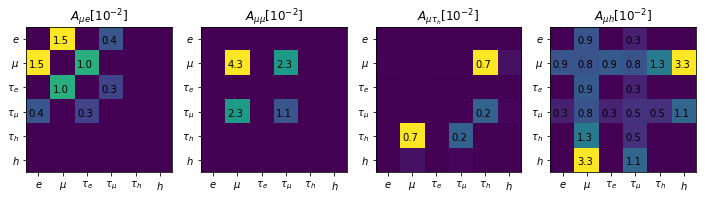

In [4]:
trigger = 'mu'
tb.imshow4Matrix(a,trigger)
plt.savefig("../plots/acceptances/{}1b".format(trigger))

In [5]:
# !!! important, do not delete !!!
# bVector = np.array([ 0.1086,0.1086, 0.1086*0.1785,  0.1086*0.1736 , 0.1086*0.6479, 0.6741 ])
# bMatrix = np.outer(bVector,bVector)
# bMatrix = bMatrix * (2*np.ones_like(bMatrix)-np.identity(6))

# av = common.matrixToArray(a[3])
# bv = common.matrixToArray(bMatrix)

# n = av * bv

# percent = (n/np.sum(n))*100
# for i in range(21):
#     if percent[i]>1:
#         print(percent[i])
#     else:
#         print('--')

# 2. Calculate Statistical Error

In [3]:
total = np.zeros([4,1,3])
# PDG
err = [ er.errConstent(source) for source in ["BtmUp","BteUp"] ]
err = np.array(err).transpose(1,0,2)
total = np.concatenate( (total,err),axis=1 )

# sysCrossSection
err = [ er.errSystem_crossSection(source) for source in ["mctt","mctw","mcw",'mcz','mcvv',"fakemu","fakee","faketau","lumin"] ]
err = np.array(err).transpose(1,0,2)
total = np.concatenate( (total,err),axis=1 )

# sysObjectEff
#err = [ er.errSystem_objectEff(source) for source in ["e","mu","tauID",'jetMisTauID'] ]
err = [ er.errSystem_objectEff(source) for source in ["e","mu",'tauIDNotFactorized'] ]
err = np.array(err).transpose(1,0,2)
total = np.concatenate( (total,err),axis=1 )

# sysEnergyScale
err = [ er.errSystem_energyScale(source) for source in ["E","Mu","Tau"] ]
err = np.array(err).transpose(1,0,2)
total = np.concatenate( (total,err),axis=1 )

# sysJet
err = [ er.errSystem_upDownVariation(source) for source in ["JES","JER","BTag","Mistag"] ]
err = np.array(err).transpose(1,0,2)
total = np.concatenate( (total,err),axis=1 )

er.io_printErrorForExcelFormat(total)

0.000,0.000,0.000, 0.000,0.000,0.000, 0.000,0.000,0.000, 0.000,0.000,0.000
0.006,0.050,0.076, 0.006,0.049,0.075, 0.009,0.050,0.076, 0.008,0.049,0.076
0.032,0.010,0.060, 0.032,0.010,0.059, 0.028,0.007,0.060, 0.028,0.007,0.060
0.007,0.004,0.103, 0.003,0.008,0.052, 0.008,0.010,0.112, 0.009,0.006,0.007
0.008,0.004,0.107, 0.003,0.009,0.054, 0.008,0.011,0.117, 0.009,0.006,0.007
0.156,0.156,0.156, 0.050,0.050,0.047, 0.148,0.152,0.164, 0.050,0.050,0.076
0.145,0.703,0.079, 0.045,0.174,0.028, 0.466,0.137,0.033, 0.066,0.045,0.022
0.000,0.020,0.012, 0.001,0.008,0.004, 0.018,0.001,0.008, 0.005,0.001,0.001
0.632,0.619,1.293, 0.417,0.404,0.712, 0.000,0.000,0.000, 0.000,0.000,0.000
0.000,0.000,0.000, 0.000,0.000,0.000, 0.371,0.378,0.788, 0.203,0.198,0.352
0.264,0.318,1.638, 0.147,0.175,0.913, 0.231,0.282,1.527, 0.118,0.143,0.790
0.150,0.278,0.035, 0.048,0.064,0.008, 0.163,0.145,0.064, 0.009,0.048,0.026
1.021,0.092,0.078, 1.039,0.094,0.076, 1.084,0.111,0.087, 1.029,0.103,0.080
0.138,1.184,0.122, 0.127,

In [7]:
# statistics
# err = [ er.errStat(source) for source in ["data","mcbg","mcsg"] ]
# err = np.array(err).transpose(1,0,2)
# er.io_printErrorForExcelFormat(err)
# total = np.concatenate( (total,err),axis=1 )

# # sysLHE
# err = [ er.errSystem_upDownVariation(source) for source in ["Renorm","Factor","PDF"] ]
# # err[0] = err[0]/(0.75/0.1)
# # err[1] = err[1]/(0.75/0.1)
# err = np.array(err).transpose(1,0,2)
# er.io_printErrorForExcelFormat(err)
# #total = np.concatenate( (total,err),axis=1 )

# # errSystem_ttTheory
# err = [ er.errSystem_upDownVariation(source) for source in [ "ISR","FSR","UE","MEPS"] ]
# # err[0] = err[0]/(0.1108*0.75/0.0011)
# # err[1] = err[1]/(0.1108*0.75/0.0011)
# err = np.array(err).transpose(1,0,2)
# er.io_printErrorForExcelFormat(err)
# #total = np.concatenate( (total,err),axis=1 )

In [4]:
# systematic
sigma_syst = total.transpose(1,0,2)
s = sigma_syst.shape
sigma_syst = sigma_syst.reshape(s[0],s[1]*s[2])

covar_syst = []
for i in sigma_syst:
    covar_syst.append(np.outer(i,i))
covar_syst = np.array(covar_syst)

# statistics
sig_stat, covar_stat_raw = er.errStat('data',returnCovar=True)
covar_stat = np.zeros([12,12])
for c in range(4):
    for i in range(3):
        for j in range(3):
            covar_stat[c*3+i,c*3+j] = covar_stat_raw[c,i,j]
            
            
covar = covar_syst
covar[0] = covar_stat

In [5]:
np.save('../data/combine/covar',covar)
np.save('../data/combine/sigma',sigma_syst) 